# Topic Modeling using BERTopic

In [97]:
!pip install bertopic

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


## Import libraries

In [278]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

from snorkel.labeling import LabelingFunction
import re
from snorkel.preprocess import preprocessor
from textblob import TextBlob

from tqdm import tqdm

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer

from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, PartOfSpeech, MaximalMarginalRelevance
from sklearn.metrics.pairwise import cosine_similarity

import spacy
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/martjebuss/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/martjebuss/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Load data

In [131]:
# Load df
df = pd.read_csv(
    "../data/chatgpt_short_clean_en.csv",
    encoding="utf-8",
)

df_long = pd.read_csv(
    "../data/chatgpt_long_clean_en.csv",
    encoding="utf-8",
)

## Remove NAs

In [132]:
df = df.dropna(subset=['content'])

In [101]:
len(df)

21352

## Delete reviews of one or two words

In [133]:
def has_multiple_words(text):
    words = text.split()
    return len(words) > 1

df = df[df['content'].apply(has_multiple_words)]


In [134]:
len(df)

21054

## BERTopic simple model

In [135]:
docs = list(df.content.values)
topic_model = BERTopic()

In [136]:
topics, probs = topic_model.fit_transform(docs)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [137]:
topic_model.get_topic_info().head(15).set_index('Topic')[
   ['Count', 'Name', 'Representation']]

,Count,Name,Representation
Topic,,,
-1,6595,-1_and_it_this_to,"[and, it, this, to, of, me, chatgpt, you, its,..."
0,390,0_chatgpt_mobile_official_app,"[chatgpt, mobile, official, app, finally, web,..."
1,362,1_voice_speech_text_feature,"[voice, speech, text, feature, audio, recognit..."
2,354,2_2021_september_update_updated,"[2021, september, update, updated, data, 2023,..."
3,313,3_ai_best_ever_seen,"[ai, best, ever, seen, app, this, apps, free, ..."
4,301,4_students_study_studies_education,"[students, study, studies, education, student,..."
5,287,5_log_login_sign_account,"[log, login, sign, account, cant, tried, passw..."
6,265,6_amazing_superb_love_this,"[amazing, superb, love, this, app, awesome, su..."
7,236,7_history_chat_chats_scroll,"[history, chat, chats, scroll, bottom, previou..."


In [138]:
topic_model.visualize_barchart(top_n_topics = 16, n_words = 10)

### Long format

In [109]:
docs = list(df_long.content.values)
topic_model = BERTopic()

In [110]:
topics, probs = topic_model.fit_transform(docs)

In [111]:
topic_model.get_topic_info().head(15).set_index('Topic')[
   ['Count', 'Name', 'Representation']]

,Count,Name,Representation
Topic,,,
-1,10143,-1_and_me_it_of,"[and, me, it, of, in, to, this, can, for, its]"
0,686,0_2021_september_update_updated,"[2021, september, update, updated, data, 2023,..."
1,563,1_chatgpt_mobile_official_app,"[chatgpt, mobile, official, app, browser, webs..."
2,435,2_voice_speech_text_recognition,"[voice, speech, text, recognition, audio, feat..."
3,383,3_students_studies_study_student,"[students, studies, study, student, exam, scho..."
4,363,4_answers_answer_questions_gives,"[answers, answer, questions, gives, question, ..."
5,312,5_chats_chat_history_conversation,"[chats, chat, history, conversation, previous,..."
6,302,6_wrost_greeaaat_bellisimo_missing,"[wrost, greeaaat, bellisimo, missing, one, thi..."
7,289,7_ai_best_seen_ever,"[ai, best, seen, ever, app, vary, ive, apps, o..."


## Improving the topic model

#### Lemmatization

In [115]:
def lemma(text): 
    tokens = re.split(r"\s+",text)
    lemmatiser = WordNetLemmatizer()
    text = " ".join([lemmatiser.lemmatize(token) for token in tokens])
    return text 

In [139]:
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

In [121]:
example_text = "lots of times the things that chatgpt says are wrong i often want to rely on chatgpt if i have questions i can't find an answer to with one single google search and it sometimes told me things that were simply wrong i can't trust the both also it doesn't know some products maybe it's time to update it's knowledge and a lot of times while chatting the system just collapses and i can't chat with the bot anymore for several minutes to hours even tho my internet connection is good"
print(example_text)
print(lemma(example_text))
print(lemmatizer(example_text))

lots of times the things that chatgpt says are wrong i often want to rely on chatgpt if i have questions i can't find an answer to with one single google search and it sometimes told me things that were simply wrong i can't trust the both also it doesn't know some products maybe it's time to update it's knowledge and a lot of times while chatting the system just collapses and i can't chat with the bot anymore for several minutes to hours even tho my internet connection is good
lot of time the thing that chatgpt say are wrong i often want to rely on chatgpt if i have question i can't find an answer to with one single google search and it sometimes told me thing that were simply wrong i can't trust the both also it doesn't know some product maybe it's time to update it's knowledge and a lot of time while chatting the system just collapse and i can't chat with the bot anymore for several minute to hour even tho my internet connection is good
lot of time the thing that chatgpt say be wrong

In [164]:
#copy = df.copy()
df = copy

In [122]:
df['content'] = df['content'].apply(lemma)

In [141]:
df['content'] = df['content'].apply(lemmatizer)

In [142]:
docs = list(df.content.values)
topic_model = BERTopic()

In [143]:
topics, probs = topic_model.fit_transform(docs)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [144]:
topic_model.get_topic_info().head(15).set_index('Topic')[
   ['Count', 'Name', 'Representation']]

,Count,Name,Representation
Topic,,,
-1,6304,-1_it_and_chatgpt_be,"[it, and, chatgpt, be, to, have, of, for, help..."
0,619,0_ai_ever_world_tool,"[ai, ever, world, tool, intelligence, human, a..."
1,360,1_voice_speech_text_feature,"[voice, speech, text, feature, audio, recognit..."
2,338,2_chatgpt_official_app_thank,"[chatgpt, official, app, thank, website, mobil..."
3,316,3_2021_update_september_2023,"[2021, update, september, 2023, information, l..."
4,234,4_ai_ever_app_this,"[ai, ever, app, this, good, see, free, life, g..."
5,218,5_openai_team_thank_their,"[openai, team, thank, their, kudo, job, wait, ..."
6,213,6_good_app_such_apphelp,"[good, app, such, apphelp, argument, oral, mas..."
7,209,7_answer_question_wrong_give,"[answer, question, wrong, give, he, sometimes,..."


In [ ]:
topic_model.visualize_barchart(top_n_topics = 16, n_words = 10)

#### Tuning parameters

In [228]:
docs = list(df.content.values)
topic_model = BERTopic()

In [229]:
main_representation_model = KeyBERTInspired()
aspect_representation_model1 = PartOfSpeech("en_core_web_sm")
aspect_representation_model2 = [KeyBERTInspired(top_n_words=30), 
                                MaximalMarginalRelevance(diversity=.5)]

representation_model = {
   "Main": main_representation_model,
   "Aspect1":  aspect_representation_model1,
   "Aspect2":  aspect_representation_model2 
}

vectorizer_model = CountVectorizer(min_df=2, stop_words = 'english')
topic_model = BERTopic(nr_topics = 'auto', 
                      vectorizer_model = vectorizer_model,
                      representation_model = representation_model)


In [230]:
X = vectorizer_model.fit_transform(docs)
vocabulary = vectorizer_model.get_feature_names_out()
print(len(vocabulary))

5171


In [231]:
topics, ini_probs = topic_model.fit_transform(docs)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [232]:
def get_topic_stats(topic_model, extra_cols = []):
    topics_info_df = topic_model.get_topic_info().sort_values('Count', ascending = False)
    topics_info_df['Share'] = 100.*topics_info_df['Count']/topics_info_df['Count'].sum()
    topics_info_df['CumulativeShare'] = 100.*topics_info_df['Count'].cumsum()/topics_info_df['Count'].sum()
    return topics_info_df[['Topic', 'Count', 'Share', 'CumulativeShare', 
                           'Name', 'Representation'] + extra_cols]

get_topic_stats(topic_model, ['Aspect1', 'Aspect2']).head(25)\
    .set_index('Topic')

,Count,Share,CumulativeShare,Name,Representation,Aspect1,Aspect2
Topic,,,,,,,
-1,7068,33.570818,33.570818,-1_app_apps_android_application,"[app, apps, android, application, mobile, chat...","[chatgpt, app, use, ai, good, great, best, lot...","[apps, android, chatgpt, ai, useful, text, tha..."
0,3344,15.882968,49.453786,0_2021_updates_latest_updated,"[2021, updates, latest, updated, update, 2023,...","[app, update, good, great, information, data, ...","[updates, latest, 2023, september, info, apps,..."
1,1595,7.575758,57.029543,1_chatgpt_chatgpts_conversational_conversations,"[chatgpt, chatgpts, conversational, conversati...","[chatgpt, language, responses, conversations, ...","[chatgpts, conversational, apps, interact, ope..."
2,800,3.799753,60.829296,2_awesome_amazing_fantastic_great,"[awesome, amazing, fantastic, great, incredibl...","[best, awesome, good, amazing, cool, great, im...","[incredible, masterpiece, happy, super, greate..."
3,536,2.545835,63.375131,3_login_unable_reinstalled_account,"[login, unable, reinstalled, account, logged, ...","[login, log, account, password, email, unable,...","[login, reinstalled, try, credentials, stuck, ..."
4,397,1.885627,65.260758,4_helpful_helpfully_helped_helps,"[helpful, helpfully, helped, helps, helping, u...","[helpful, lot, thanks, helping, stress, assist...","[helpfully, assistance, help, greatly, thankyo..."
5,364,1.728888,66.989646,5_ai_apps_app_software,"[ai, apps, app, software, applications, applic...","[ai, app, apps, life, artificial, application,...","[ai, apps, youtube, recommend, advanced, image..."
6,358,1.700389,68.690035,6_voicetotext_voice_microphone_audio,"[voicetotext, voice, microphone, audio, speech...","[voice, speech, text, feature, audio, recognit...","[voicetotext, microphone, transcription, speak..."
7,281,1.334663,70.024698,7_useful_usefulness_useless_purposes,"[useful, usefulness, useless, purposes, purpos...","[useful, students, student, ingredients, stabi...","[usefulness, purpose, use, convenient, technol..."


In [260]:
topic_model.get_topic(9)

[('telephone', 0.55235445),
 ('phone', 0.4920091),
 ('number', 0.4854372),
 ('numbers', 0.43627506),
 ('cellphone', 0.41902268),
 ('phones', 0.41098958),
 ('calls', 0.38999927),
 ('address', 0.38979998),
 ('needs', 0.37257206),
 ('need', 0.36359888)]

In [267]:
topic_model.get_representative_docs(6)

['great helpful should get a voice feature though',
 'it have to do something better for voice into text converter',
 'voice to speech feature is not so good but chatgpt! is really']

## Add topics to df

In [274]:
df_topic = pd.DataFrame({"topic": topics, "content": docs})
df_topic

,topic,content
0,1,chatgpt on android is a solid app with seamles...
1,6,i've been using chatgpt for a while but i've j...
2,-1,the chatgpt android app has completely blown m...
3,0,no subscription free and accurate unbiased ans...
4,1,i use this app for learning languages which ch...
...,...,...
21049,66,first review
21050,47,first downloaded
21051,0,usually app
21052,56,first comment


In [272]:
df_merged = pd.merge(df, df_topic, on="content")
df_merged

,Unnamed: 0,reviewId,userName,content,score,thumbsUpCount,at,replyContent,repliedAt,appVersion,at_ymd,at_q,at_ym,at_m,at_wd,score_cat,detected_language,topic
0,0,36b7f28e-151d-4b98-8a13-41bd017e0d25,Lin Cheng,chatgpt on android is a solid app with seamles...,4,5,2023-10-19 19:26:19,NaN,NaN,1.2023.284,10/19/23,4,2023-10,October,Thursday,neutral,en,1
1,1,2bc253b6-c804-47e9-b6f2-3a21027efab4,Alim,i've been using chatgpt for a while but i've j...,5,139,2023-09-29 20:24:38,NaN,NaN,1.2023.263,09/29/23,3,2023-09,September,Friday,positive,en,6
2,2,5f084727-ab85-40b3-bd42-a7a49502fc1f,Theo Healy,the chatgpt android app has completely blown m...,4,247,2023-07-28 10:29:10,NaN,NaN,1.0.0023,07/28/23,3,2023-07,July,Friday,neutral,en,-1
3,3,5df90de5-b8e2-4dc2-b6ff-520aa3a25eae,Elliot Limberg,no subscription free and accurate unbiased ans...,5,272,2023-07-30 19:38:37,NaN,NaN,1.0.0023,07/30/23,3,2023-07,July,Sunday,positive,en,0
4,4,bb66c666-865d-4a31-b27f-4933df3ff829,Phoebe Moraes,i use this app for learning languages which ch...,4,126,2023-08-09 18:23:33,NaN,NaN,1.0.0030,08/09/23,3,2023-08,August,Wednesday,neutral,en,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127069,30906,d5b8ad76-8e43-48aa-9c65-65f9c6724259,Pips Miner,first rating,5,0,2023-07-25 17:44:41,NaN,NaN,NaN,07/25/23,3,2023-07,July,Tuesday,positive,en,-1
127070,30909,a9ea2b59-ca49-4ff1-a6c4-ff98141d0063,Asokan Madhushan,200th comment,5,0,2023-08-01 05:23:56,NaN,NaN,NaN,08/01/23,3,2023-08,August,Tuesday,positive,en,56
127071,30911,af93c4fc-330c-4e1a-906e-42cb2d530f6b,Manish Kuntal,beat response,5,0,2023-07-27 05:08:17,NaN,NaN,NaN,07/27/23,3,2023-07,July,Thursday,positive,en,112
127072,30918,0530373c-1bfc-45d2-9dec-9fc0bb9cff4d,mostafijur rahman,usually app,5,0,2023-07-25 17:15:19,NaN,NaN,NaN,07/25/23,3,2023-07,July,Tuesday,positive,en,0


In [340]:
df_merged.to_csv("../data/chatgpt_short_topics_wip.csv")

### Visualization

In [154]:
topic_model.visualize_barchart(top_n_topics = 21, n_words = 10)

In [156]:
topic_model.visualize_topics()

### Embedding model

## Search topics

Note: You can only use this method if an embedding model was supplied to BERTopic using embedding_model.

In [226]:
similar_topics, similarity = topic_model.find_topics("voice", top_n=5)
topic_model.get_topic(similar_topics[0])

[('voicetotext', 0.7687919),
 ('voice', 0.64830846),
 ('speechtotext', 0.62790406),
 ('microphone', 0.5031773),
 ('audio', 0.48563433),
 ('speech', 0.46069753),
 ('transcription', 0.45139158),
 ('speaker', 0.41808367),
 ('text', 0.41523013),
 ('speak', 0.40731138)]

## Topics per Class 

### App Rating (positive, neutral, negative)

In [167]:
topics_per_class = topic_model.topics_per_class(docs, classes=df.score_cat)
fig = topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=15, 
                                      normalize_frequency = True)

fig.write_html('basic.html')
fig.show()

### App Version 

In [189]:
df_version = df.dropna(subset=['appVersion'])

In [199]:
df_version['content'] = df_version['content'].apply(lemmatizer)

In [200]:
docs = list(df_version.content.values)
topic_model = BERTopic()

In [201]:
main_representation_model = KeyBERTInspired()
aspect_representation_model1 = PartOfSpeech("en_core_web_sm")
aspect_representation_model2 = [KeyBERTInspired(top_n_words=30), 
                                MaximalMarginalRelevance(diversity=.5)]

representation_model = {
   "Main": main_representation_model,
   "Aspect1":  aspect_representation_model1,
   "Aspect2":  aspect_representation_model2 
}

vectorizer_model = CountVectorizer(min_df=2, stop_words = 'english')
topic_model = BERTopic(nr_topics = 'auto', 
                      vectorizer_model = vectorizer_model,
                      representation_model = representation_model)

topics, ini_probs = topic_model.fit_transform(docs)
def get_topic_stats(topic_model, extra_cols = []):
    topics_info_df = topic_model.get_topic_info().sort_values('Count', ascending = False)
    topics_info_df['Share'] = 100.*topics_info_df['Count']/topics_info_df['Count'].sum()
    topics_info_df['CumulativeShare'] = 100.*topics_info_df['Count'].cumsum()/topics_info_df['Count'].sum()
    return topics_info_df[['Topic', 'Count', 'Share', 'CumulativeShare', 
                           'Name', 'Representation'] + extra_cols]

get_topic_stats(topic_model, ['Aspect1', 'Aspect2']).head(25)\
    .set_index('Topic')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

,Count,Share,CumulativeShare,Name,Representation,Aspect1,Aspect2
Topic,,,,,,,
0,6644,37.185873,37.185873,0_chatgpt_app_chat_android,"[chatgpt, app, chat, android, openai, conversa...","[app, chatgpt, helpful, useful, update, good, ...","[chatgpt, app, openai, conversation, ai, devel..."
-1,5975,33.441540,70.627414,-1_chatgpt_app_android_chat,"[chatgpt, app, android, chat, application, mob...","[chatgpt, app, use, good, work, answer, ai, th...","[chatgpt, app, ai, useful, developer, conversa..."
1,332,1.858174,72.485588,1_awesome_tomorrow_hype_wanna,"[awesome, tomorrow, hype, wanna, super, specta...","[awesome, amazing, cool, good, great, ride, to...","[awesome, tomorrow, hype, spectacular, usual, ..."
2,246,1.376840,73.862428,2_voicetotext_voice_speechtotext_microphone,"[voicetotext, voice, speechtotext, microphone,...","[voice, speech, text, audio, feature, input, r...","[voicetotext, transcription, alexa, pause, sir..."
3,202,1.130576,74.993004,3_openai_thank_thanks_happy,"[openai, thank, thanks, happy, forward, respec...","[openai, team, thank, application, product, ma...","[openai, thank, respect, introduce, feature, f..."
4,180,1.007444,76.000448,4_answer_response_reply_inquiry,"[answer, response, reply, inquiry, ask, questi...","[answer, question, wrong, correct, additional,...","[reply, matter, wisdom, allot, point, plant, s..."
5,160,0.895506,76.895953,5_image_photo_camera_picture,"[image, photo, camera, picture, upload, graphi...","[image, picture, photo, camera, video, scan, p...","[upload, scan, caption, text, lens, display, g..."
6,148,0.828343,77.724296,6_number_phone_cellphone_register,"[number, phone, cellphone, register, require, ...","[number, phone, verification, landline, code, ...","[number, register, need, mobile, landline, pas..."
7,146,0.817149,78.541445,7_gpt_gpt35_masse_good,"[gpt, gpt35, masse, good, case, nt, support, m...","[gpt, free, use, version, web, bad, quality, a...","[gpt35, masse, case, nt, quality, pixel, peak,..."


In [202]:
topics_per_class = topic_model.topics_per_class(docs, classes=df_version.appVersion)

In [203]:
fig = topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=15, 
                                      normalize_frequency = True)

fig.write_html('basic.html')
fig.show()

## Timeline / Deep-dive EDA

In [184]:
#docs = list(df.content.values)
#topic_model = BERTopic()

In [334]:
df_neg_top15 = df_merged[(df_merged["score_cat"] == "negative") & (df_merged["topic"]< 15)]

In [313]:
df_negative = df_merged[(df_merged["score_cat"] == "negative") & (df_merged["topic"] == 6)]

In [285]:
df_negative.columns

Index(['Unnamed: 0', 'reviewId', 'userName', 'content', 'score',
       'thumbsUpCount', 'at', 'replyContent', 'repliedAt', 'appVersion',
       'at_ymd', 'at_q', 'at_ym', 'at_m', 'at_wd', 'score_cat',
       'detected_language', 'topic'],
      dtype='object')

In [314]:
df_negative['at'] = pd.to_datetime(df_negative['at'])
df_negative['at'].sort_values()

7596    2023-07-25 17:17:30
9591    2023-07-25 17:22:33
2498    2023-07-25 17:37:55
9540    2023-07-25 19:05:41
9346    2023-07-26 06:10:46
                ...        
1174    2023-10-17 12:40:37
1476    2023-10-18 07:36:17
207     2023-10-20 04:01:11
27540   2023-10-21 13:15:15
9520    2023-10-21 15:18:35
Name: at, Length: 83, dtype: datetime64[ns]

In [320]:
df_negative["week_number"] = df_negative['at'].dt.isocalendar().week

In [329]:
week_count = df_negative.groupby('week_number')['reviewId'].count().reset_index()
week_count

,week_number,reviewId
0,30,17
1,31,14
2,32,3
3,33,5
4,34,3
5,35,4
6,36,4
7,37,3
8,38,4
9,39,6


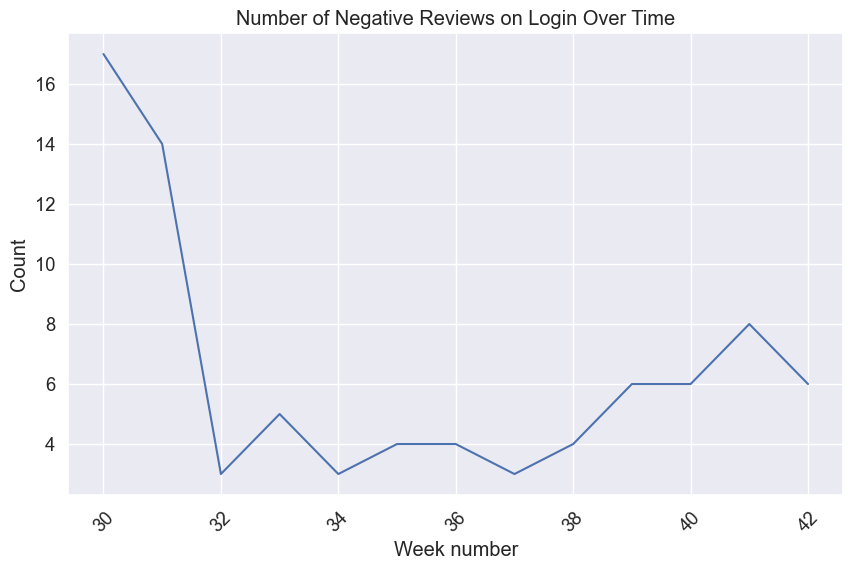

In [337]:
plt.figure(figsize=(10, 6))
plt.plot(week_count["week_number"], week_count["reviewId"])
plt.xlabel('Week number')
plt.ylabel('Count')
plt.title('Number of Negative Reviews on Login Over Time')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

[Text(0.5, 0, 'Topic'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Distribution of Topics')]

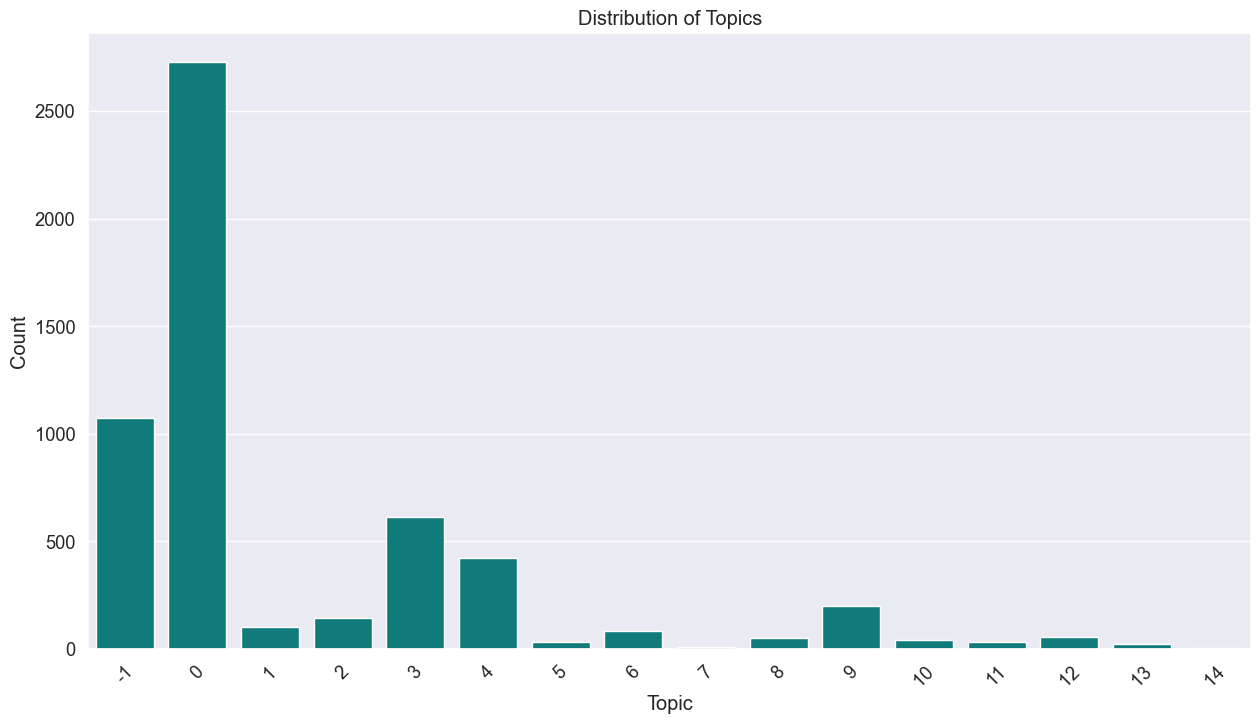

In [335]:
# Countplot shows the distribution of Publication
plt.rcParams['figure.figsize'] = [15, 8]
sns.set(font_scale = 1.2, style = 'darkgrid')
sns_year = sns.countplot(x=df_neg_top15['topic'], color = 'darkcyan')
plt.xticks(rotation=45)
sns_year.set(xlabel = "Topic", ylabel = "Count", title = "Distribution of Topics")

In [ ]:
sns.lineplot(data=df_negative, x="month", y="passengers")

In [185]:
topics_per_class = topic_model.topics_per_class(docs, classes=df.at_m)
fig = topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=15, 
                                      normalize_frequency = True)

fig.write_html('basic.html')
fig.show()

ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [165]:
df.head()

,Unnamed: 0,reviewId,userName,content,score,thumbsUpCount,at,replyContent,repliedAt,appVersion,at_ymd,at_q,at_ym,at_m,at_wd,score_cat,detected_language
0,0,36b7f28e-151d-4b98-8a13-41bd017e0d25,Lin Cheng,chatgpt on android is a solid app with seamles...,4,5,2023-10-19 19:26:19,NaN,NaN,1.2023.284,10/19/23,4,2023-10,October,Thursday,neutral,en
1,1,2bc253b6-c804-47e9-b6f2-3a21027efab4,Alim,i've been using chatgpt for a while but i've j...,5,139,2023-09-29 20:24:38,NaN,NaN,1.2023.263,09/29/23,3,2023-09,September,Friday,positive,en
2,2,5f084727-ab85-40b3-bd42-a7a49502fc1f,Theo Healy,the chatgpt android app has completely blown m...,4,247,2023-07-28 10:29:10,NaN,NaN,1.0.0023,07/28/23,3,2023-07,July,Friday,neutral,en
3,3,5df90de5-b8e2-4dc2-b6ff-520aa3a25eae,Elliot Limberg,no subscription free and accurate unbiased ans...,5,272,2023-07-30 19:38:37,NaN,NaN,1.0.0023,07/30/23,3,2023-07,July,Sunday,positive,en
4,4,bb66c666-865d-4a31-b27f-4933df3ff829,Phoebe Moraes,i use this app for learning languages which ch...,4,126,2023-08-09 18:23:33,NaN,NaN,1.0.0030,08/09/23,3,2023-08,August,Wednesday,neutral,en


Summary: 
- Bugs with login, other errors  
- Educational purpose, studying 
- Helping, Assistance 
- Phone number for registration needed, verification
- Feature request on uploading photos, gettung responses with images 
- Translation problems for hindi speakers 
- future-oriented topic

## Dealing with Outliers

-1 represents outliers: 6841! 

In [67]:
percentage_outliers = (6841 / 22371)*100 
percentage_outliers

30.579768450225735

Four different strategies to deal with the outliers:
1. based on topic-document probabilities,
2. based on topic distributions,
3. based on c-TF-IFD representations,
4. based on document and topic embeddings.

## Reducing the number of topics

In [158]:
topic_model.visualize_heatmap(n_clusters = 20)

In [159]:
distance_matrix = cosine_similarity(np.array(topic_model.topic_embeddings_))
dist_df = pd.DataFrame(distance_matrix, columns=topic_model.topic_labels_.values(), 
                       index=topic_model.topic_labels_.values())

tmp = []
for rec in dist_df.reset_index().to_dict('records'):
    t1 = rec['index']
    for t2 in rec:
        if t2 == 'index': 
            continue
        tmp.append(
            {
                'topic1': t1, 
                'topic2': t2, 
                'distance': rec[t2]
            }
        )

pair_dist_df = pd.DataFrame(tmp)

pair_dist_df = pair_dist_df[(pair_dist_df.topic1.map(
      lambda x: not x.startswith('-1'))) & 
            (pair_dist_df.topic2.map(lambda x: not x.startswith('-1')))]
pair_dist_df = pair_dist_df[pair_dist_df.topic1 < pair_dist_df.topic2]
pair_dist_df.sort_values('distance', ascending = False).head(20)

,topic1,topic2,distance
40635,200_android_app_native_phone,32_android_mobile_finally_os,0.887677
9373,45_review_reviewer_follow_complaint,80_review_reviewer_rating_thank,0.887035
28134,138_use_easy_simple_easily,55_useful_use_practical_handy,0.885001
377,0_app_application_use_download,174_app_experience_use_wonderful,0.878171
346,0_app_application_use_download,143_app_interesting_neat_curious,0.869638
426,1_chatgpt_conversation_conversational_chat,21_chatgpt_openai_chat_android,0.855959
22378,109_grammar_grammatical_editing_speech,157_app_language_application_translation,0.854126
4889,23_app_2021_2023_currentupdate,40_app_improvement_improve_appian,0.853135
27043,132_chatgpt_chatgpts_login_unable,176_chatgpt_unable_error_wifi,0.851943
3677,17_app_webview_mobile_version,40_app_improvement_improve_appian,0.850428


### Merging

Intentionally left blank as we should take a deeper look into the clusters to see what can be merged

In [ ]:
#topic_model.merge_topics(docs, [[26, 74], [43, 68, 62], [16, 50, 91]])
#df['merged_topic'] = topic_model.topics_

## Topic Distributions

In [160]:
topic_distr, topic_token_distr = topic_model.approximate_distribution(
      docs, window = 4, calculate_tokens=True)

In [161]:
topic_model.visualize_distribution(topic_distr[1])

In [162]:
# Calculate the topic distributions on a token-level
topic_distr, topic_token_distr = topic_model.approximate_distribution(docs, calculate_tokens=True)

# Visualize the token-level distributions
df = topic_model.visualize_approximate_distribution(docs[1], topic_token_distr[1])
df

,have,be,use,chatgpt,for,while,but,have,just,test,out,the,microphone,speech,recognition,option,for,the,first,time,and,let,we,say,be,completely,blow,away,no,seriously,it,literally,put,all,the,expression,punctuation,in,the,right,place,no,matter,how,you,talk,it,convert,it,without,problem,it,be,amazing,and,will,probably,will,never,type,to,chatgpt,again,still,though,that,be,some,outstanding,work,now,we,wait,for,voice,response,from,the,both,hopefully
0_app_application_use_download,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.139,0.314,0.489,0.489,0.350,0.175,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1_chatgpt_conversation_conversational_chat,0.205,0.410,0.614,0.863,0.658,0.453,0.248,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.248,0.497,0.497,0.497,0.248,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.106,0.106,0.106,0.106,0.000
3_awesome_hopefully_hype_wanna,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.139,0.397,0.655,0.655,0.516,0.258,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5_login_password_reinstall_unable,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.137,0.273,0.410,0.547,0.410,0.273,0.137,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6_voicetotext_voice_speechtotext_microphone,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.225,0.503,0.794,1.118,1.077,0.798,0.508,0.184,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.443,0.877,1.430,1.982,1.539,1.105,0.553,0.000,0.000
10_answer_reply_question_ask,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.110,0.110,0.110,0.110,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
12_image_photo_pic_picture,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.129,0.129,0.129,0.129,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,

TO-DO: 

- append topic names to df 
- merge similar topics
